In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss,roc_auc_score,accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import f1_score, recall_score, classification_report
from sklearn.metrics import fbeta_score
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from itertools import cycle
import pickle
from xgboost import XGBClassifier
from xgboost import plot_importance
from itertools import cycle
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:

train1 = pd.read_csv('features.csv')
train1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,subject,FinalGrade,Regularity,Grade1,Grade2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,0,11,11,Portuguese,Satisfactory,Always Regular,Failure,Satisfactory
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,2,9,11,11,Portuguese,Satisfactory,Always Regular,Poor,Satisfactory
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,6,12,13,12,Portuguese,Satisfactory,Always Regular,Satisfactory,Satisfactory
3,GP,F,15,U,GT3,T,4,2,health,services,...,5,0,14,14,14,Portuguese,Satisfactory,Always Regular,Satisfactory,Satisfactory
4,GP,F,16,U,GT3,T,3,3,other,other,...,5,0,11,13,13,Portuguese,Satisfactory,Always Regular,Satisfactory,Satisfactory


In [3]:
def correlation(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(20, 15))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns)
#     plt.savefig('Correlation.png', bbox_inches='tight')
    plt.show()

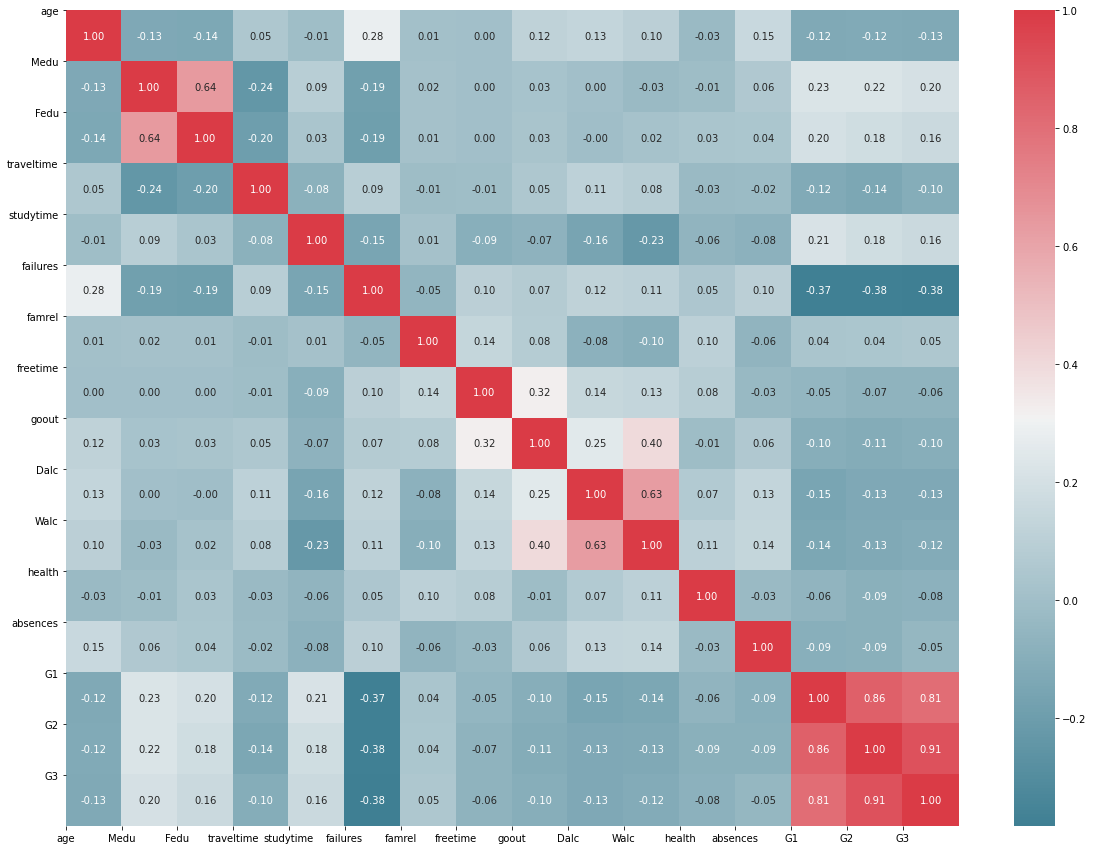

In [4]:
correlation(train1)

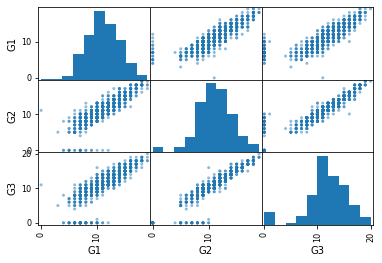

In [5]:
from pandas.plotting import scatter_matrix
grades = train1[['G1','G2','G3']]
scatter_matrix(grades)
# plt.savefig('grades.png', bbox_inches='tight')
plt.show()                                                        #shows the correlation between these features
                                                                  #the dots are individual person
                                                                  #the ones that are away are outliers


In [6]:
le=preprocessing.LabelEncoder()

In [7]:
le.fit(train1['FinalGrade'])
train1['FinalGrade']=le.transform(train1['FinalGrade'])
y=train1['FinalGrade']
# train1 = train1.drop(labels=['Regularity','Grade1','Grade2'],axis=1)

In [8]:
train1 = pd.get_dummies(train1)

In [9]:
# y=train1.FinalGrade
train1 = train1.drop(labels=['G3','FinalGrade','Fjob_at_home','Fjob_teacher','Pstatus_A','Pstatus_T'],axis=1)
train1.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Grade1_Excellent,Grade1_Failure,Grade1_Good,Grade1_Poor,Grade1_Satisfactory,Grade2_Excellent,Grade2_Failure,Grade2_Good,Grade2_Poor,Grade2_Satisfactory
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,0,0,0,0,0,0,1
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,0,0,1
2,15,1,1,1,2,0,4,3,2,2,...,0,0,0,0,1,0,0,0,0,1
3,15,4,2,1,3,0,3,2,2,1,...,0,0,0,0,1,0,0,0,0,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,0,1,0,0,0,0,1


In [10]:
x_train,x_val,y_train,y_val = train_test_split(train1,y,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(783, 70)
(783,)
(261, 70)
(261,)


In [11]:
def confusionmatrix(y_val,y_pred):
    labels = list(range(0,5))
    cm=confusion_matrix(y_val,y_pred)
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(labels); 
    ax.yaxis.set_ticklabels(labels);
#     plt.savefig('confusion_matrix.png', bbox_inches='tight')
    
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    total = lambda x : x.sum()/5
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    print('percentage of sensitivity = '+str(total(TPR)*100))

    # Specificity or true negative rate
    TNR = TN/(TN+FP) 

    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    print('percentage of precision = '+str(total(PPV)*100))
    # Negative predictive value
    NPV = TN/(TN+FN)

    # Fall out or false positive rate
    FPR = FP/(FP+TN)

    # False negative rate
    FNR = FN/(TP+FN)

    # False discovery rate
    FDR = FP/(TP+FP)

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print('Accuracy percentage = '+str(total(ACC)*100))

# roc plot

In [12]:

def ROC_plot(x_train,x_val,model):
    train = pd.read_csv('features.csv')
    train.head()
    y=train[['FinalGrade']]
    train = train.drop(['G3'],axis=1);
    train = train.drop(['FinalGrade'],axis=1);
    train = train.drop(['G2'],axis=1);
    train = train.drop(['G1'],axis=1);
    y = label_binarize(y, classes=['Failure','Poor','Satisfactory','Good','Excellent'])
    n_classes = y.shape[1]
    
    X_train, X_test, y_train, y_test = train_test_split(train,y,random_state=0)
    
    classifier = OneVsRestClassifier(model)
    y_score = classifier.fit(x_train, y_train).decision_function(x_val)
    y_score.shape
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    
    # Individual ROC
    plt.figure()
    lw = 2
    for i in (0,1):
        plt.subplot(1,2,i+1)
        plt.plot(fpr[i], tpr[i], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic label'+str(i))
        plt.legend(loc="lower right")
#     plt.savefig('ROC1.png', bbox_inches='tight')
    plt.plot()

    plt.figure()
    lw = 2
    for i in (2,3):
        plt.subplot(1,2,i-1)
        plt.plot(fpr[i], tpr[i], color='red',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic label'+str(i))
        plt.legend(loc="lower right")
#     plt.savefig('ROC2.png', bbox_inches='tight')
    plt.plot()

    plt.figure()
    lw = 2
    plt.subplot(1,2,1)
    plt.plot(fpr[4], tpr[4], color='grey',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[4])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic label'+str(4))
    plt.legend(loc="lower right")
    plt.savefig('ROC3',box_inches='tight')
    plt.plot()
    
    
    # Combined ROC
    
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
        print('Area Under the Curve with label '+str(i)+' is '+str(roc_auc[i]))
    plt.savefig('ROC4', bbox_inches='tight')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.rcParams["figure.figsize"] = (10,6)

In [13]:

def ROC_plot1(x_train,x_val,model):
    train = pd.read_csv('features.csv')
    train.head()
    y=train[['FinalGrade']]
    train = train.drop(['G3'],axis=1);
    train = train.drop(['FinalGrade'],axis=1);
    train = train.drop(['G2'],axis=1);
    train = train.drop(['G1'],axis=1);
    y = label_binarize(y, classes=['Failure','Poor','Satisfactory','Good','Excellent'])
    n_classes = y.shape[1]
    
    X_train, X_test, y_train, y_test = train_test_split(train,y,random_state=0)
    
    classifier = OneVsRestClassifier(model)
    y_score = classifier.fit(x_train, y_train).predict_proba(x_val)
    y_score.shape
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    
    # Individual ROC
    plt.figure()
    lw = 2
    for i in (0,1):
        plt.subplot(1,2,i+1)
        plt.plot(fpr[i], tpr[i], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic label'+str(i))
        plt.legend(loc="lower right")
#     plt.savefig('ROC1.png', bbox_inches='tight')
    plt.plot()

    plt.figure()
    lw = 2
    for i in (2,3):
        plt.subplot(1,2,i-1)
        plt.plot(fpr[i], tpr[i], color='red',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic label'+str(i))
        plt.legend(loc="lower right")
#     plt.savefig('ROC2.png', bbox_inches='tight')
    plt.plot()

    plt.figure()
    lw = 2
    plt.subplot(1,2,1)
    plt.plot(fpr[4], tpr[4], color='grey',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[4])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic label'+str(4))
    plt.legend(loc="lower right")
    plt.savefig('ROC3',box_inches='tight')
    plt.plot()
    
    
    # Combined ROC
    
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
        print('Area Under the Curve with label '+str(i)+' is '+str(roc_auc[i]))
    plt.savefig('ROC4', bbox_inches='tight')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.rcParams["figure.figsize"] = (10,6)

In [14]:
def Fscore(y_val,y_pred):
    print('f score = ' + str(f1_score(y_val, y_pred, average="macro")))


In [15]:
def recall(y_val,y_pred):
    print('percentage of recall score = '+str(recall_score(y_val, y_pred, average="macro"))) 

In [16]:
def report(y_val,y_pred):
    target_names = ['Failure','Poor','Satisfactory','Good','Excellent']
    print('Classification Report')
    print(classification_report(y_val, y_pred, target_names=target_names))

In [17]:
def fbeta(y_val,y_pred):
    print('Fbeta score = ' + str(fbeta_score(y_val,y_pred,average='macro', beta=0.5)))

# Logistic Regression

In [18]:
def logistic_regression_model(x_train,y_train,x_val,y_val):
    lr =  LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_val)
    y_predict = lr.predict_proba(x_val)
    print("Log_Loss: ",log_loss(y_val,y_predict))
    print("Accuracy_Score: ",accuracy_score(y_val,y_pred))
    confusionmatrix(y_val,y_pred)
    Fscore(y_val,y_pred)
    recall(y_val,y_pred)
    report(y_val,y_pred)
    fbeta(y_val,y_pred)
    return lr

Log_Loss:  0.5050073793516586
Accuracy_Score:  0.789272030651341
percentage of sensitivity = 71.46076416808124
percentage of precision = 72.64765669113496
Accuracy percentage = 91.57088122605363
f score = 0.7175913131536511
percentage of recall score = 0.7146076416808124
Classification Report
              precision    recall  f1-score   support

     Failure       0.57      0.67      0.62         6
        Poor       0.57      0.53      0.55        15
Satisfactory       0.91      0.73      0.81        41
        Good       0.77      0.78      0.78        91
   Excellent       0.81      0.86      0.83       108

    accuracy                           0.79       261
   macro avg       0.73      0.71      0.72       261
weighted avg       0.79      0.79      0.79       261

Fbeta score = 0.7221500100125986
Area Under the Curve with label 0 is 0.9528455284552846
Area Under the Curve with label 1 is 0.9219133807369102
Area Under the Curve with label 2 is 0.8937908496732027
Area Under the C

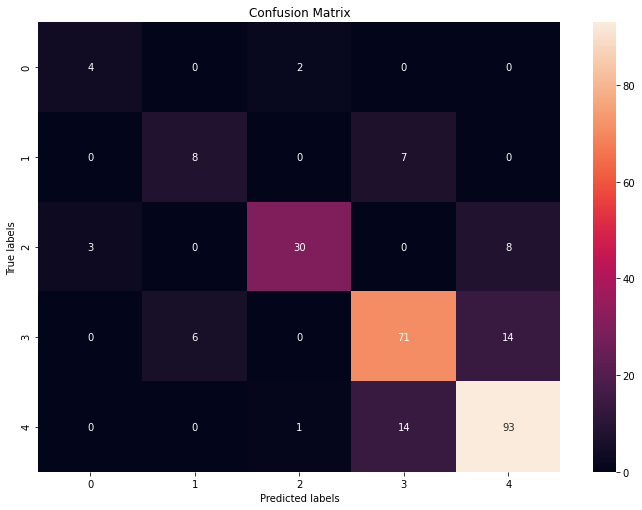

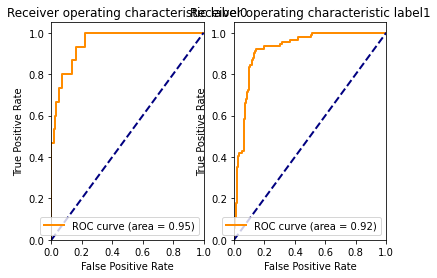

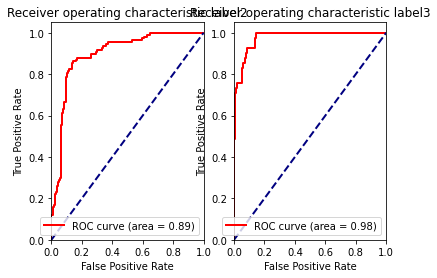

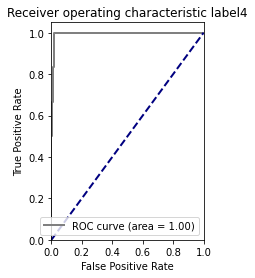

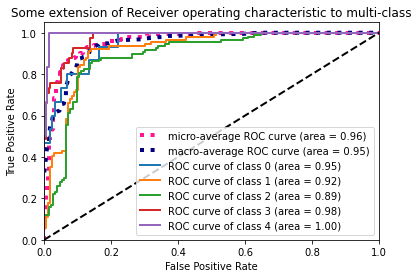

In [19]:
model =logistic_regression_model(x_train,y_train,x_val,y_val)
ROC_plot(x_train,x_val,model)

In [20]:
filename = 'pickle/model_lr.pkl'
outfile = open(filename,'wb')
pickle.dump(model,outfile)
outfile.close()


# Random Forest

In [21]:
def random_forest_model(x_train,y_train,x_val,y_val):
    random_forest = RandomForestClassifier(n_estimators=28,max_depth=5,random_state=0)

    forest = random_forest.fit(x_train, y_train)
    print("Random Forest Train data Score" , ":" , forest.score(x_train, y_train) 
          , "," ,"Validation data Score" ,":" , forest.score(x_val, y_val))
    Y_pred = random_forest.predict_proba(x_val)
    Y_pred1 = random_forest.predict(x_val)
    print("Log_Loss: ",log_loss(y_val,Y_pred))
    confusionmatrix(y_val,Y_pred1)
    Fscore(y_val,Y_pred1)
    recall(y_val,Y_pred1)
    report(y_val,Y_pred1)
    fbeta(y_val,Y_pred1)
    return forest


Random Forest Train data Score : 0.8620689655172413 , Validation data Score : 0.8160919540229885
Log_Loss:  0.5500067951388179
percentage of sensitivity = 70.73752444484151
percentage of precision = 79.21069755335762
Accuracy percentage = 92.64367816091955
f score = 0.7359310376186469
percentage of recall score = 0.7073752444484152
Classification Report
              precision    recall  f1-score   support

     Failure       0.67      0.67      0.67         6
        Poor       0.75      0.40      0.52        15
Satisfactory       0.94      0.73      0.82        41
        Good       0.77      0.87      0.82        91
   Excellent       0.83      0.87      0.85       108

    accuracy                           0.82       261
   macro avg       0.79      0.71      0.74       261
weighted avg       0.82      0.82      0.81       261

Fbeta score = 0.7646814768245026
Area Under the Curve with label 0 is 0.9747967479674796
Area Under the Curve with label 1 is 0.9274078862314157
Area Under

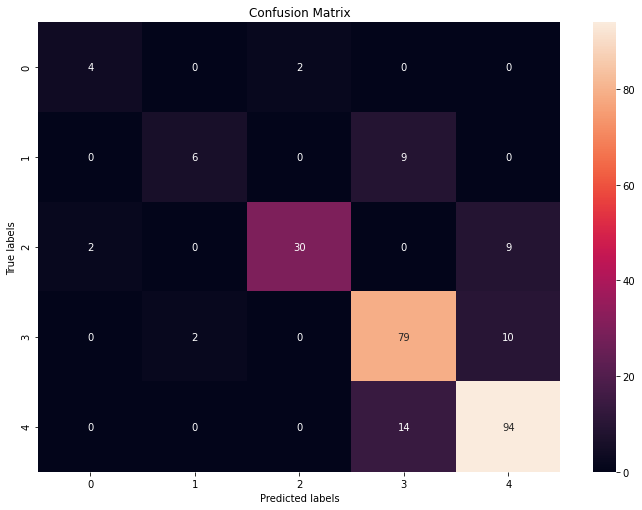

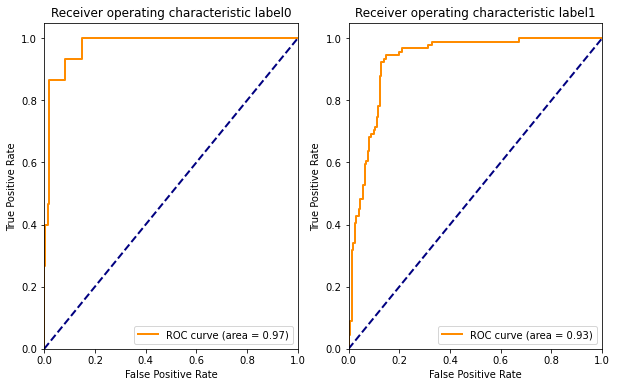

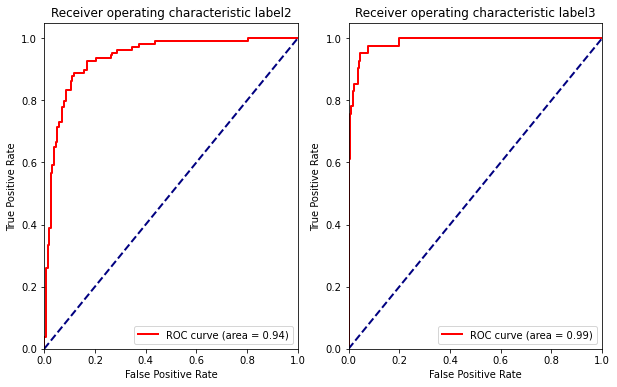

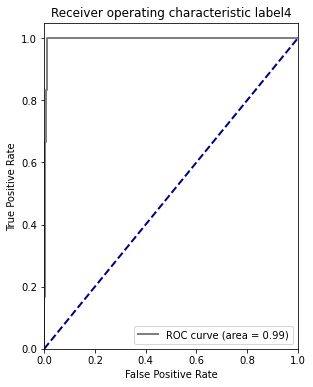

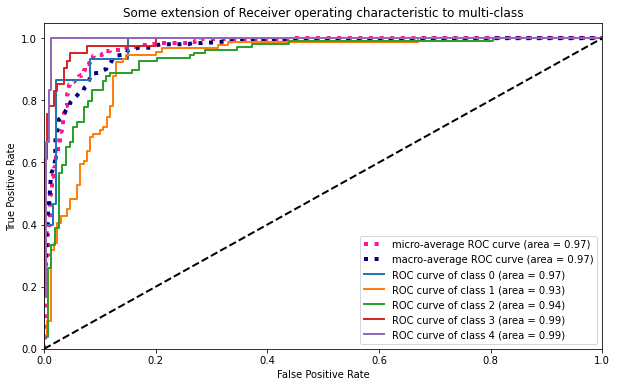

In [22]:
model = random_forest_model(x_train,y_train,x_val,y_val)
ROC_plot1(x_train,x_val,model)

In [23]:
filename = 'pickle/model_rf.pkl'
outfile = open(filename,'wb')
pickle.dump(model,outfile)
outfile.close()


# SVM model

In [24]:
def SVM_Model(X_train,Y_train,X_test,y_val):
    svc = SVC()
    svc.fit(X_train, Y_train)
    Y_pred = svc.predict(X_test)
    print("SVM Train data Score" , ":" , svc.score(X_train, y_train)
          , "," ,"Validation data Score" ,":" , svc.score(X_test, y_val))
    confusionmatrix(y_val,Y_pred)
    Fscore(y_val,Y_pred)
    recall(y_val,Y_pred)
    report(y_val,Y_pred)
    fbeta(y_val,Y_pred)
    return svc


SVM Train data Score : 0.8122605363984674 , Validation data Score : 0.8045977011494253
percentage of sensitivity = 56.778442876003844
percentage of precision = nan
Accuracy percentage = 92.18390804597702
f score = 0.5905203443955551
percentage of recall score = 0.5677844287600384
Classification Report
              precision    recall  f1-score   support

     Failure       0.00      0.00      0.00         6
        Poor       1.00      0.33      0.50        15
Satisfactory       0.82      0.76      0.78        41
        Good       0.78      0.88      0.82        91
   Excellent       0.82      0.87      0.84       108

    accuracy                           0.80       261
   macro avg       0.68      0.57      0.59       261
weighted avg       0.79      0.80      0.79       261

Fbeta score = 0.6280175879077761
Area Under the Curve with label 0 is 0.9766937669376694
Area Under the Curve with label 1 is 0.9281835811247576
Area Under the Curve with label 2 is 0.9253207455821835
Area Un

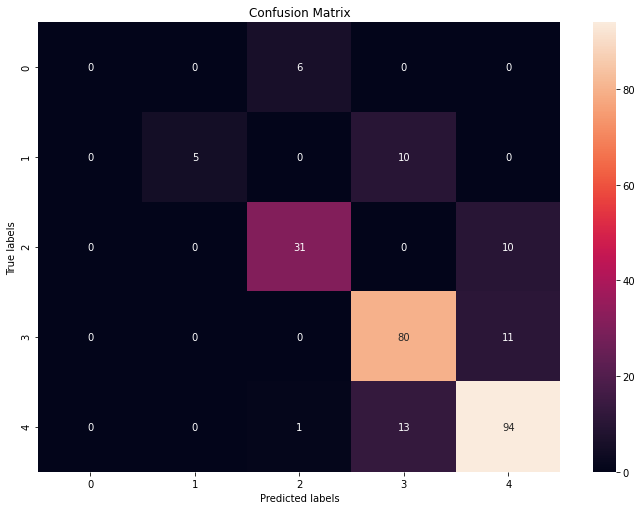

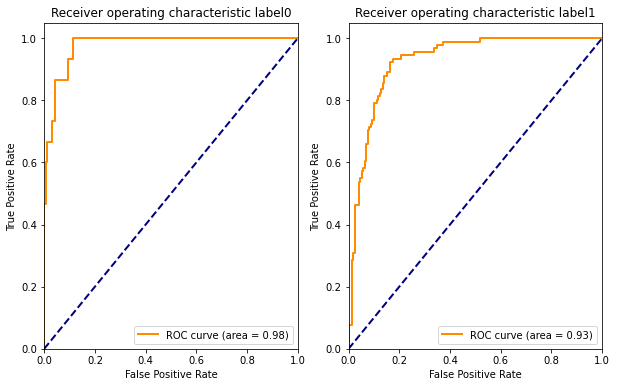

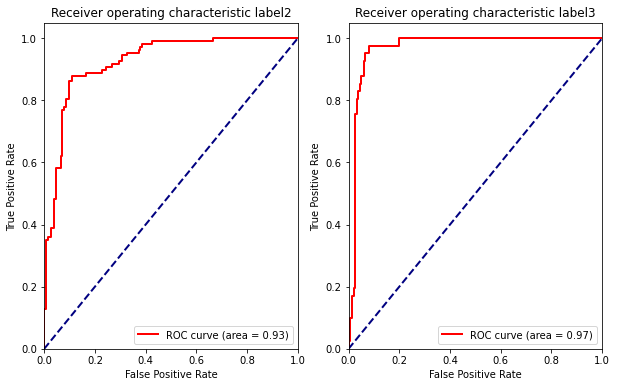

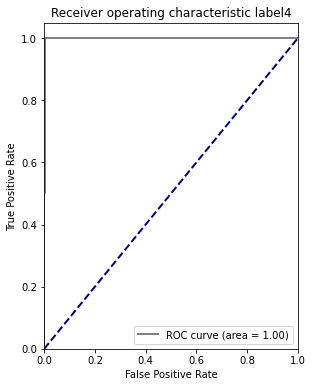

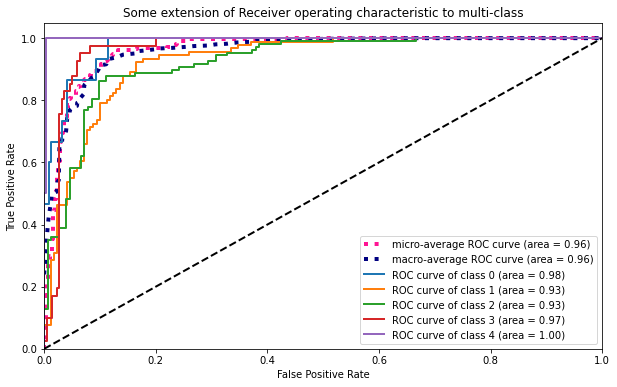

In [25]:
model = SVM_Model(x_train,y_train,x_val,y_val)
ROC_plot(x_train,x_val,model)


In [26]:
filename = 'pickle/model_svm.pkl'
outfile = open(filename,'wb')
pickle.dump(model,outfile)
outfile.close()


# Decission Trees

In [27]:
def Decison_tree_Model(x_train,y_train,x_val,y_val):
    tree = DecisionTreeClassifier(min_samples_leaf=9,random_state=0)
    tf= tree.fit(x_train, y_train)
    y_pred = tf.predict(x_val)
    y_predict = tf.predict_proba(x_val)
    print("Decisioin Tree Train data Score" , ":" , tf.score(x_train, y_train) 
          , "," , "Validation data Score" ,":" , tf.score(x_val, y_val))
    confusionmatrix(y_val,y_pred)
    print("Log_Loss: ",log_loss(y_val,y_predict))
    Fscore(y_val,y_pred)
    recall(y_val,y_pred)
    report(y_val,y_pred)
    fbeta(y_val,y_pred)
    return tree



Decisioin Tree Train data Score : 0.8671775223499362 , Validation data Score : 0.8352490421455939
percentage of sensitivity = 84.70339597168865
percentage of precision = 78.16673491673491
Accuracy percentage = 93.40996168582377
Log_Loss:  1.7419152630748576
f score = 0.8033768498313509
percentage of recall score = 0.8470339597168864
Classification Report
              precision    recall  f1-score   support

     Failure       0.60      1.00      0.75         6
        Poor       0.69      0.73      0.71        15
Satisfactory       0.94      0.83      0.88        41
        Good       0.83      0.80      0.82        91
   Excellent       0.85      0.87      0.86       108

    accuracy                           0.84       261
   macro avg       0.78      0.85      0.80       261
weighted avg       0.84      0.84      0.84       261

Fbeta score = 0.7885344808414613
Area Under the Curve with label 0 is 0.9573170731707318
Area Under the Curve with label 1 is 0.9198125404007759
Area Unde

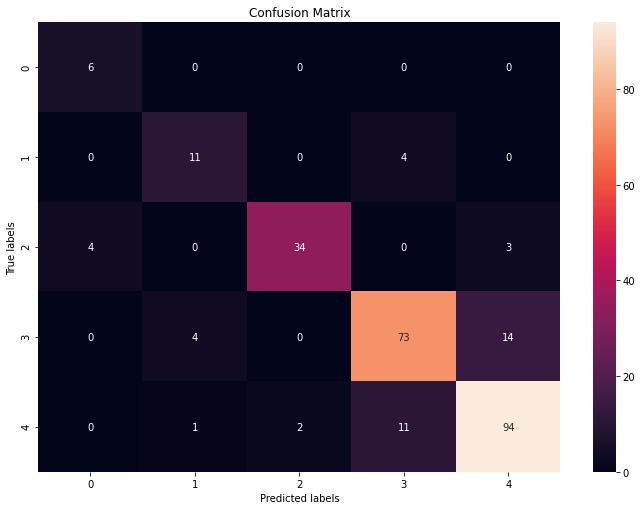

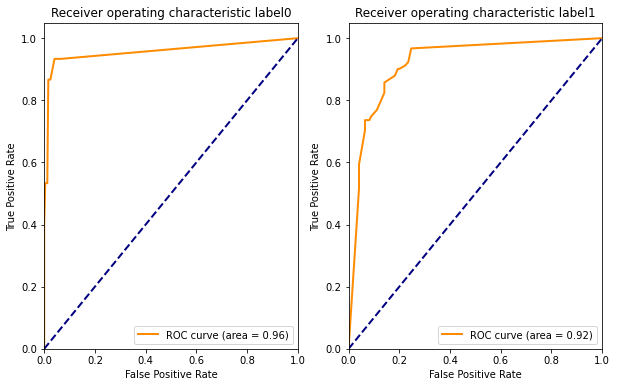

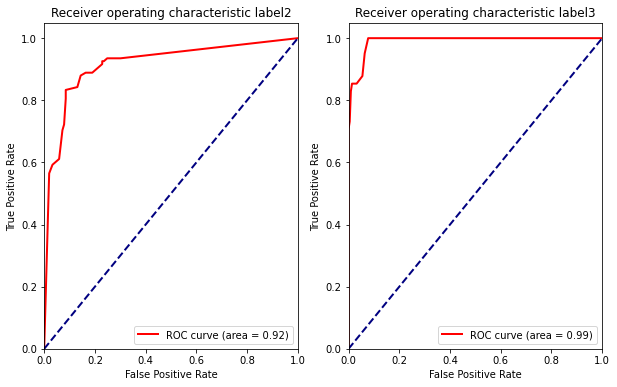

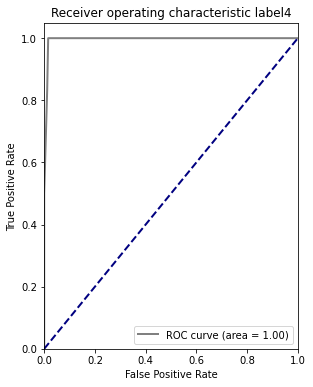

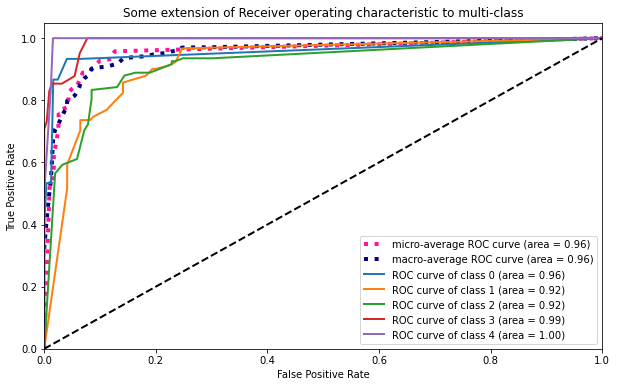

In [28]:
model = Decison_tree_Model(x_train,y_train,x_val,y_val)
ROC_plot1(x_train,x_val,model)

In [29]:
filename = 'pickle/model_dt.pkl'
outfile = open(filename,'wb')
pickle.dump(model,outfile)
outfile.close()

# Ada boost model

In [30]:
def ada_boost_model(x_train,y_train,x_val,y_val):
    ada = AdaBoostClassifier(n_estimators=2)
    af = ada.fit(x_train, y_train)
    y_pred = af.predict(x_val)
    y_predict = af.predict_proba(x_val)
    print("Ada Boost Train data Score" , ":" , af.score(x_train, y_train) 
          , "," ,"Validation data Score" ,":" , af.score(x_val, y_val))
    print("Log_Loss: ",log_loss(y_val,y_predict))
    confusionmatrix(y_val,y_pred)
    Fscore(y_val,y_pred)
    recall(y_val,y_pred)
    report(y_val,y_pred)
    fbeta(y_val,y_pred)
    return ada

Ada Boost Train data Score : 0.7675606641123882 , Validation data Score : 0.7931034482758621
Log_Loss:  0.678003328537191
percentage of sensitivity = 53.378698988455085
percentage of precision = nan
Accuracy percentage = 91.72413793103449
f score = 0.4966256670571392
percentage of recall score = 0.5337869898845509
Classification Report
              precision    recall  f1-score   support

     Failure       0.00      0.00      0.00         6
        Poor       0.00      0.00      0.00        15
Satisfactory       0.73      0.98      0.83        41
        Good       0.73      0.93      0.82        91
   Excellent       0.92      0.76      0.83       108

    accuracy                           0.79       261
   macro avg       0.48      0.53      0.50       261
weighted avg       0.75      0.79      0.76       261

Fbeta score = 0.4820380879923783
Area Under the Curve with label 0 is 0.8715447154471545
Area Under the Curve with label 1 is 0.9103749191984486
Area Under the Curve with la

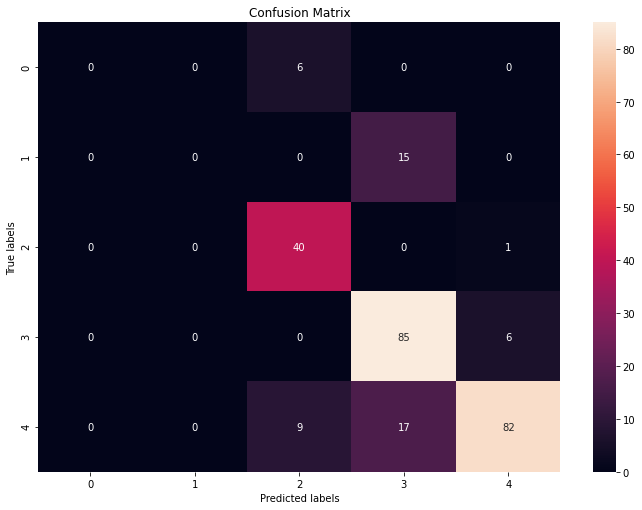

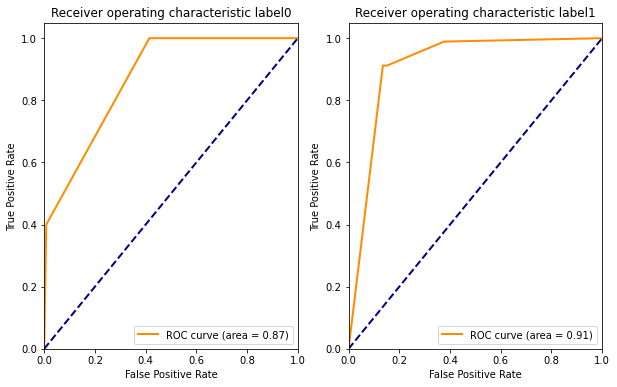

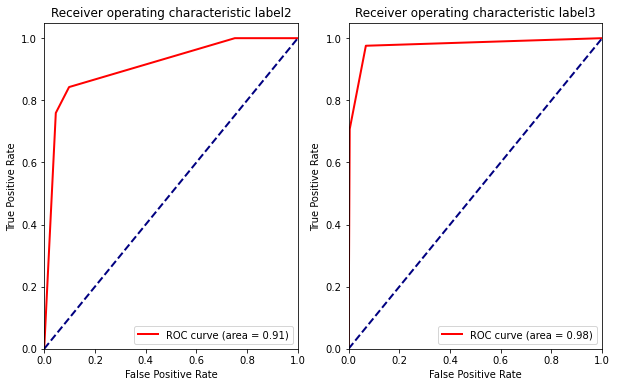

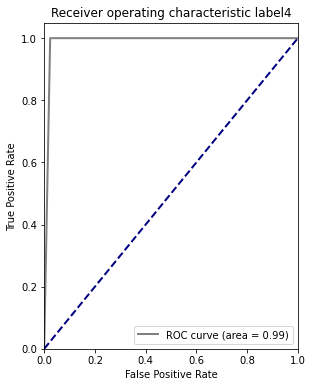

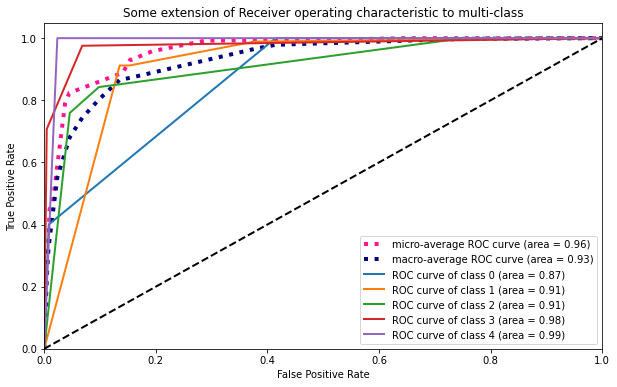

In [31]:
model = ada_boost_model(x_train,y_train,x_val,y_val)
ROC_plot(x_train,x_val,model)

In [32]:
filename = 'pickle/model_ada.pkl'
outfile = open(filename,'wb')
pickle.dump(model,outfile)
outfile.close()

# XGBoost Model

In [33]:
def XGBoost(x_train,y_train,x_val,y_val):
    model = XGBClassifier()
    model = XGBClassifier(learning_rate=0.1,n_estimators=80,eval_metric='mlogloss')
    mf = model.fit(x_train,y_train)
    y_pred=model.predict(x_val)
    y_predict = mf.predict_proba(x_val)
    print("XGBoost Train data Score" , ":" , mf.score(x_train, y_train) 
          , "," ,"Validation data Score" ,":" , mf.score(x_val, y_val))
    print("Log_Loss: ",log_loss(y_val,y_predict))
    confusionmatrix(y_val,y_pred)
    Fscore(y_val,y_pred)
    recall(y_val,y_pred)
    report(y_val,y_pred)
    fbeta(y_val,y_pred)
    
    
    # plot feature importance
    fig, ax = plt.subplots(figsize=(10, 20))
    plot_importance(model, ax=ax)
#     plt.savefig('Feature_Engineering.png', bbox_inches='tight')
    plt.show()
    return model

XGBoost Train data Score : 1.0 , Validation data Score : 0.8390804597701149
Log_Loss:  0.44798505828908547
percentage of sensitivity = 84.99236626065894
percentage of precision = 86.32123787730195
Accuracy percentage = 93.5632183908046
f score = 0.8531231921644871
percentage of recall score = 0.8499236626065894
Classification Report
              precision    recall  f1-score   support

     Failure       0.86      1.00      0.92         6
        Poor       0.92      0.73      0.81        15
Satisfactory       0.89      0.83      0.86        41
        Good       0.83      0.84      0.83        91
   Excellent       0.82      0.85      0.84       108

    accuracy                           0.84       261
   macro avg       0.86      0.85      0.85       261
weighted avg       0.84      0.84      0.84       261

Fbeta score = 0.8582845338944878


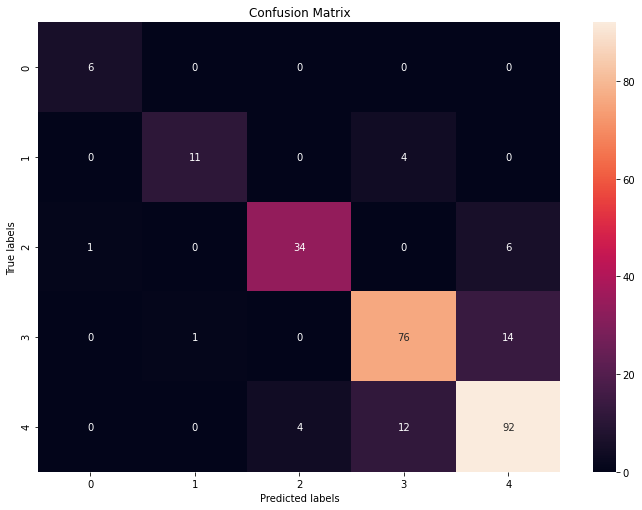

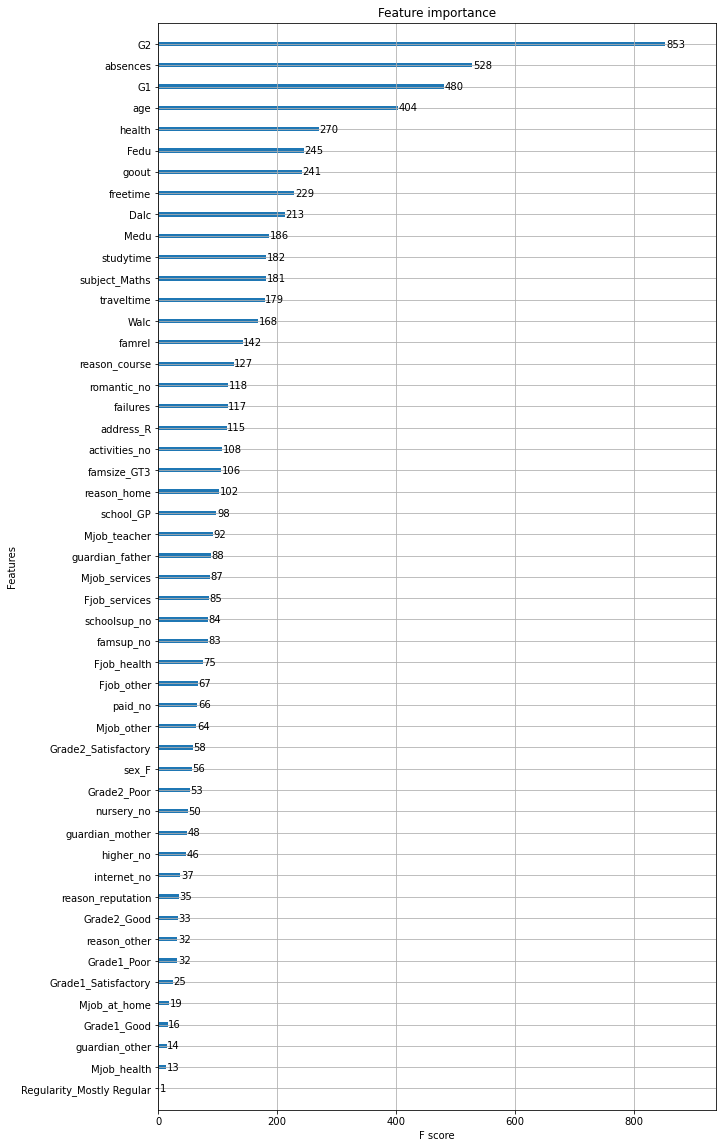

In [34]:
model = XGBoost(x_train,y_train,x_val,y_val)
# ROC_plot(x_train,x_val,model)

#  K Cross Validations

In [35]:
def k_cross_validations(x_train,y_train,):
    import warnings
    warnings.filterwarnings('ignore')
    X = x_train
    y = y_train
    kf = KFold(n_splits=10) # Define the split - into 2 folds 
    kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
    print(kf) 
    KFold(n_splits=10, random_state=None, shuffle=False)
    return kf

In [36]:
kf = k_cross_validations(x_train,y_train)
classifier = model
cross_val_score(classifier,x_train, y_train, cv=kf, n_jobs=1)


KFold(n_splits=10, random_state=None, shuffle=False)


array([0.83544304, 0.81012658, 0.78481013, 0.84615385, 0.82051282,
       0.76923077, 0.84615385, 0.80769231, 0.83333333, 0.85897436])

In [37]:
sum(cross_val_score(classifier,x_train, y_train, cv=kf, n_jobs=1))/10


0.8212431028886724

# Features Importance

In [38]:
def FeatureImportance():
    # Build a classification task using 3 informative features
    X, y = make_classification(n_samples=1000,
                               n_features=10,
                               n_informative=3,
                               n_redundant=0,
                               n_repeated=0,
                               n_classes=2,
                               random_state=0,
                               shuffle=False)

    # Build a forest and compute the feature importances
    forest = ExtraTreesClassifier(n_estimators=250,random_state=0)

    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


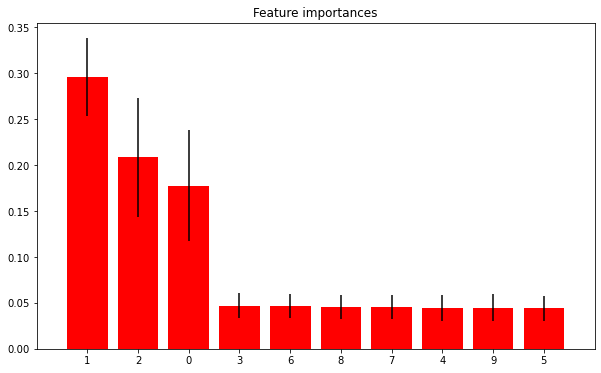

In [39]:
FeatureImportance()




#  Finally we choose XGBoost Model
# 
#  Train data Score : 0.9386973180076629 
# 
#  Validation data Score : 0.8850574712643678


In [40]:

filename = 'pickle/model_xgb.pkl'
outfile = open(filename,'wb')
pickle.dump(model,outfile)
outfile.close()